#### 08/27/2024
futher investigating DESeq results based on notes from SGW 

first, loading in the dataframes originally generated in deseq_analysis.ipynb that are needed for DESeq
- these would include the counts matrix and meta data

In [12]:
# loading required packages
library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)
library(dplyr)
library(ggh4x)

In [7]:
counts <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/counts_formatted.csv')
head(counts)

,X,BBB.WBO.B21,BBB.WBV.B70,BBO.BBO.B16,BBO.BBY.B27,BBO.WBO.B16,BBO.WBV.B64,BBR.BBB.B50,BBR.BBG.B38,BBR.BBY.B26,⋯,WBR.BBY.W25,WBV.WBO.W23,WBV.WBR.W12,WBY.BBV.W65,WBY.BBY.W30,WPB.BPG.G45,WPO.BPO.G16,WPO.BPY.G28,WPR.BPY.G25,WPV.BPR.G11
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111120752,2,2,0,0,2,0,0,0,1,⋯,0,0,0,0,1,0,0,1,1,0
2,LOC111109452,0,0,0,0,1,1,10,12,0,⋯,0,1,0,1,2,15,0,0,3,0
3,LOC111124802,597,453,408,244,502,434,187,336,311,⋯,122,120,57,289,202,168,134,86,252,9
4,LOC111101273,173,146,115,75,171,158,64,115,137,⋯,43,45,18,87,81,71,52,38,73,1
5,LOC111101250,253,255,257,118,327,269,115,141,184,⋯,91,96,24,254,109,92,49,5,101,2
6,LOC111101262,645,634,502,364,647,677,246,389,355,⋯,184,146,52,387,251,188,131,78,283,12


In [8]:
# removing the extra info from the file name
cleaned_column_names <- gsub("^X2018\\.\\.", "", gsub("\\.CV_alignment\\.sam$", "", colnames(counts)))
head(cleaned_column_names)

# replace the '.' with '-'
cleaned_column_names2 <- gsub('\\.', "-", cleaned_column_names)
head(cleaned_column_names2)

# now assigning to the columns
colnames(counts) = cleaned_column_names2
head(counts)

[1] "X"           "BBB.WBO.B21" "BBB.WBV.B70" "BBO.BBO.B16" "BBO.BBY.B27"
[6] "BBO.WBO.B16"

[1] "X"           "BBB-WBO-B21" "BBB-WBV-B70" "BBO-BBO-B16" "BBO-BBY-B27"
[6] "BBO-WBO-B16"

,X,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111120752,2,2,0,0,2,0,0,0,1,⋯,0,0,0,0,1,0,0,1,1,0
2,LOC111109452,0,0,0,0,1,1,10,12,0,⋯,0,1,0,1,2,15,0,0,3,0
3,LOC111124802,597,453,408,244,502,434,187,336,311,⋯,122,120,57,289,202,168,134,86,252,9
4,LOC111101273,173,146,115,75,171,158,64,115,137,⋯,43,45,18,87,81,71,52,38,73,1
5,LOC111101250,253,255,257,118,327,269,115,141,184,⋯,91,96,24,254,109,92,49,5,101,2
6,LOC111101262,645,634,502,364,647,677,246,389,355,⋯,184,146,52,387,251,188,131,78,283,12


In [9]:
# setting the gene name as the row name and deleting that column
rownames(counts) <- counts$X
counts2 <- counts[-1]

head(counts2)

,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111120752,2,2,0,0,2,0,0,0,1,0,⋯,0,0,0,0,1,0,0,1,1,0
LOC111109452,0,0,0,0,1,1,10,12,0,2,⋯,0,1,0,1,2,15,0,0,3,0
LOC111124802,597,453,408,244,502,434,187,336,311,110,⋯,122,120,57,289,202,168,134,86,252,9
LOC111101273,173,146,115,75,171,158,64,115,137,45,⋯,43,45,18,87,81,71,52,38,73,1
LOC111101250,253,255,257,118,327,269,115,141,184,49,⋯,91,96,24,254,109,92,49,5,101,2
LOC111101262,645,634,502,364,647,677,246,389,355,108,⋯,184,146,52,387,251,188,131,78,283,12


In [10]:
meta <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/CV_CE18_meta.csv')

# changing rownames to the unique sample ID
rownames(meta) <- meta$unique_ID

meta$treatment <- paste(meta$Phase1, meta$Phase2)

# pulling out only the rows I need
meta <- select(meta, Phase1, Phase2, treatment)
head(meta)

,Phase1,Phase2,treatment
,<chr>,<chr>,<chr>
BBB-WBO-B21,hypoxic,control,hypoxic control
BBB-WBV-B70,hypoxic,control,hypoxic control
BBO-BBO-B16,hypoxic,hypoxic,hypoxic hypoxic
BBO-BBY-B27,hypoxic,hypoxic,hypoxic hypoxic
BBO-WBO-B16,hypoxic,control,hypoxic control
BBO-WBV-B64,hypoxic,control,hypoxic control


In [11]:
# setting the same order for counts matrix and meta data
counts2 <- counts2[,rownames(meta)]
all(rownames(meta) == colnames(counts2))

[1] TRUE

now ready for analysis

## Making *all* pairwise comparisons
we want to look at all pairwise comparisons, just to get the full picture..

these include:
- control control vs. hypoxic hypoxic
- hypoxic control vs. control hypoxic

In [18]:
# removing warm both and both both samples
meta_filtered <- filter(meta, meta$Phase2 != 'both')

# need to remove them from counts as well
counts_filtered <- counts2[, colnames(counts2) %in% rownames(meta_filtered)]

dim(meta_filtered)
dim(counts_filtered)

[1] 20  3

[1] 13544    20

#### control control vs. hypoxic hypoxic

In [19]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
dds <- DESeqDataSetFromMatrix(countData = counts_filtered,
                              colData = meta_filtered, 
                              design = ~ treatment)
dds=DESeq(dds)
resultsNames(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automa

[1] "Intercept"                                   
[2] "treatment_control.hypoxic_vs_control.control"
[3] "treatment_hypoxic.control_vs_control.control"
[4] "treatment_hypoxic.hypoxic_vs_control.control"

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 0, 0%
LFC < -0.25 (down) : 0, 0%
outliers [1]       : 294, 2.2%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



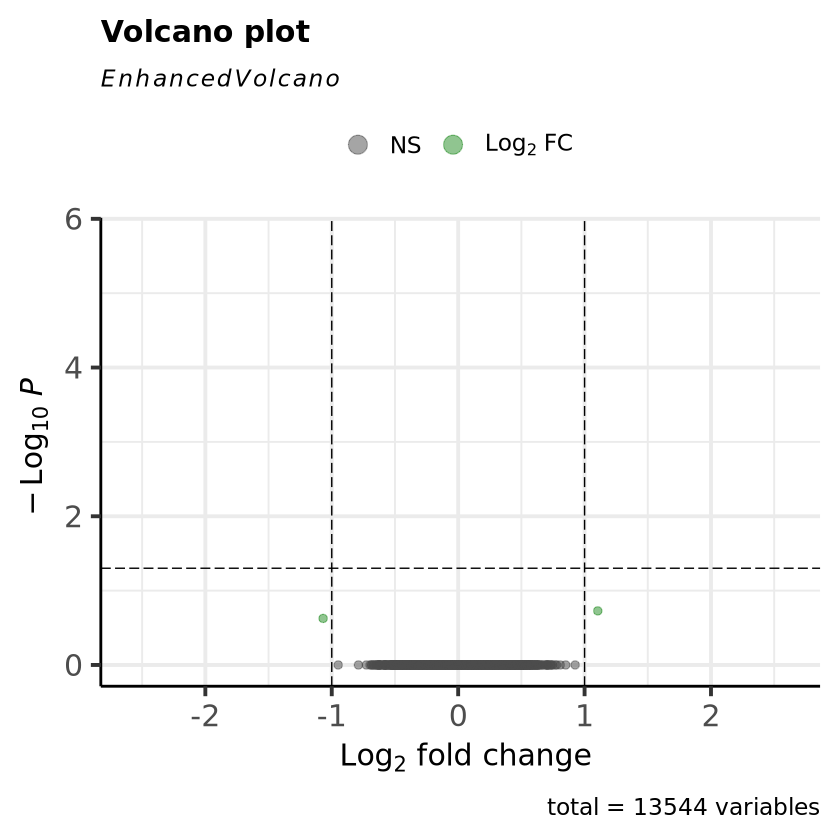

In [30]:
# control control vs. hypoxic hypoxic

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls<-lfcShrink(dds, # dds object
                      coef = 4, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls)

EnhancedVolcano(ls, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 20, 0.15%
LFC < -0.25 (down) : 84, 0.62%
outliers [1]       : 294, 2.2%
low counts [2]     : 4264, 32%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



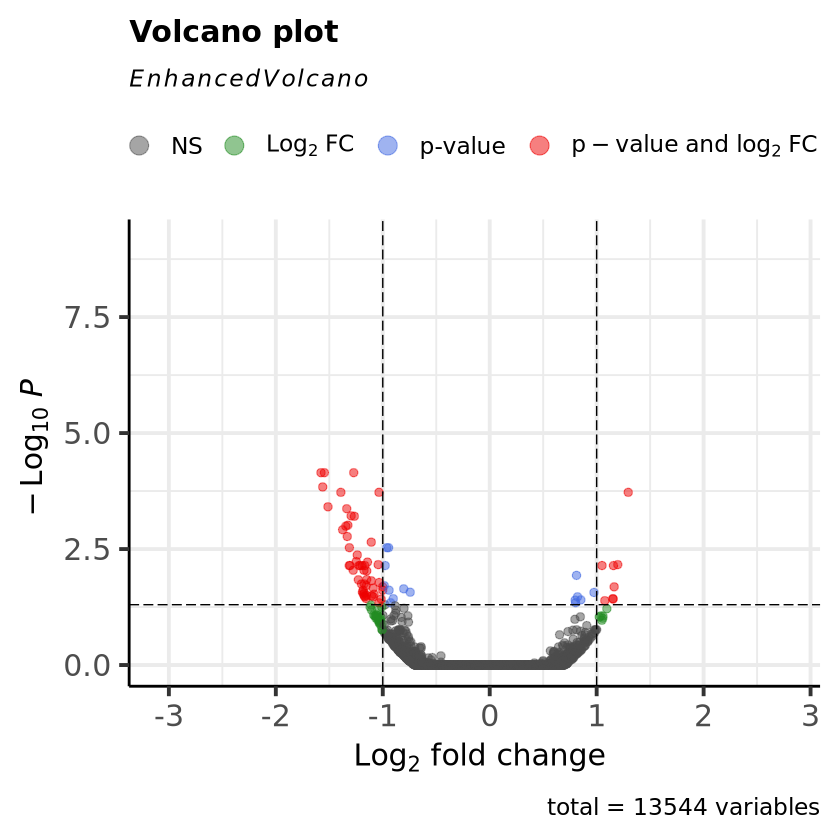

In [33]:
# hypoxic control vs. control control

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls<-lfcShrink(dds, # dds object
                      coef = 3, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls)

EnhancedVolcano(ls, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 0, 0%
LFC < -0.25 (down) : 0, 0%
outliers [1]       : 294, 2.2%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



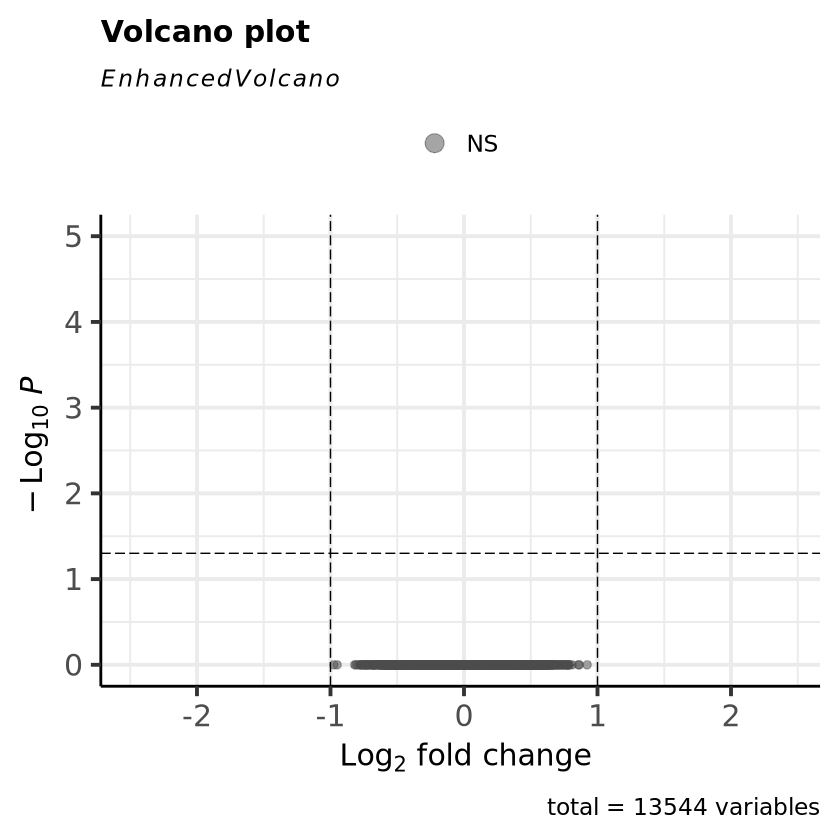

In [34]:
# control hypoxic vs. control control

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls<-lfcShrink(dds, # dds object
                      coef = 2, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls)

EnhancedVolcano(ls, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

#### hypoxic control vs. control hypoxic

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 146, 1.1%
LFC < -0.25 (down) : 241, 1.8%
outliers [1]       : 294, 2.2%
low counts [2]     : 4506, 33%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



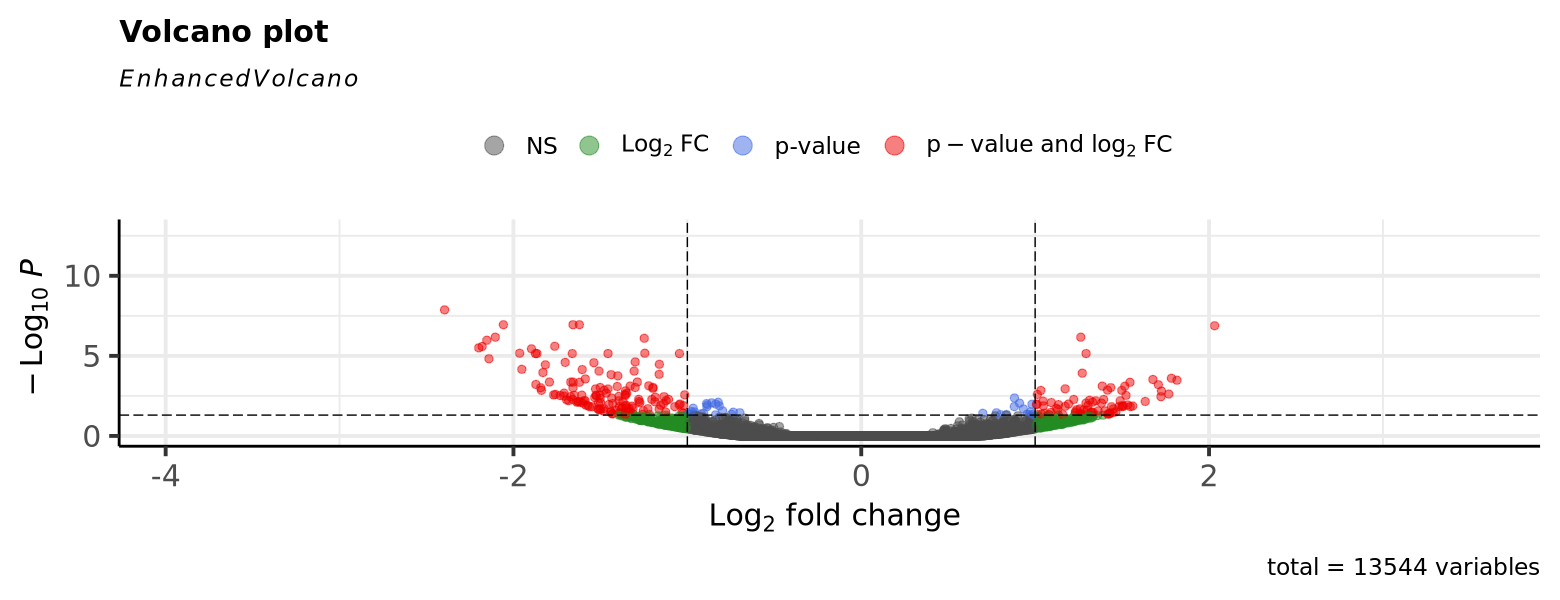

In [35]:
# hypoxic control vs. control hypoxic

contrast2 <- c("treatment", "hypoxic control", "control hypoxic")
# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls<-lfcShrink(dds, # dds object
                      contrast = contrast2, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls)

EnhancedVolcano(ls, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

so there is a difference in methylation for *when* you experience hypoxic stress

In [38]:
df <- as.data.frame(ls)
# adding column to tell us if this gene has more methylation in each treatment
df$more_me_in <- ifelse(df$log2FoldChange<0 & df$padj < 0.05, "control_hypoxic",
                        ifelse(df$log2FoldChange>0 & df$padj < 0.05, "hypoxic_control", 
                               "not significant"))

Warning message:
“Removed 4813 rows containing missing values or values outside the scale range
(`geom_point()`).”


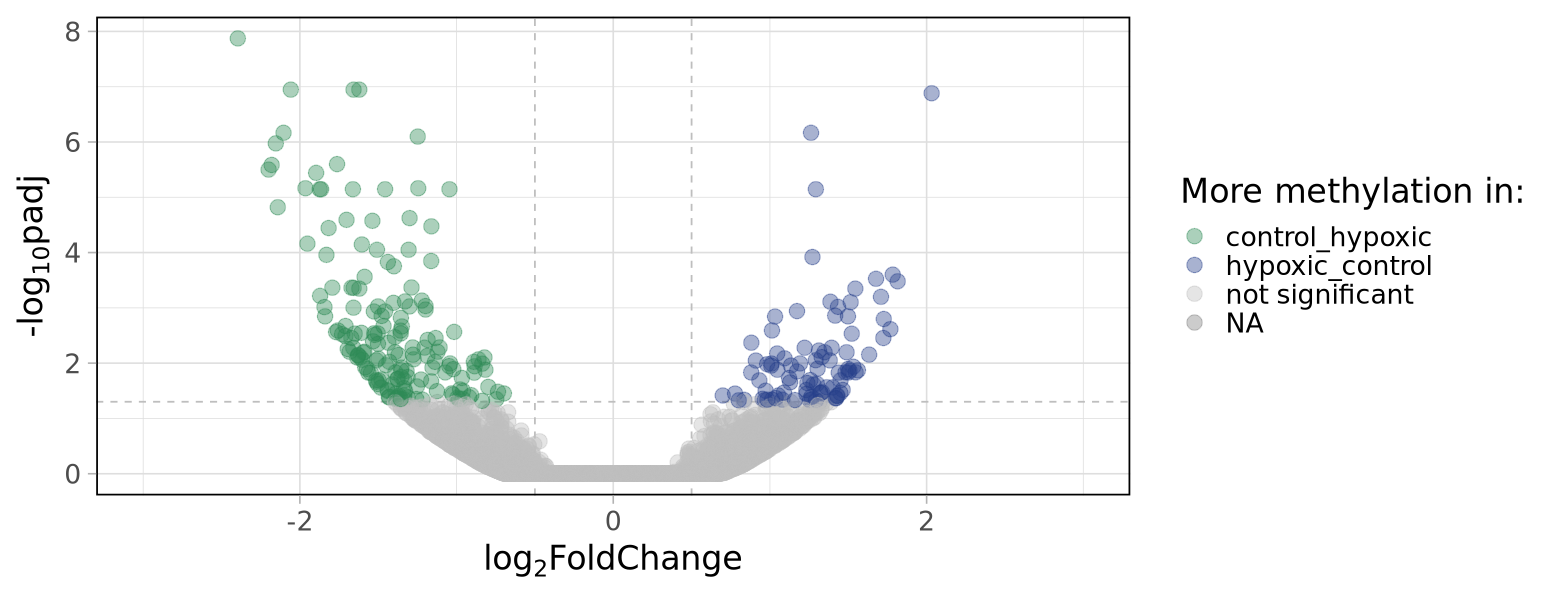

In [41]:
# changes size of plots
options(repr.plot.width=13, repr.plot.height=5)

# ggplot volcano plot
volcano_ce <- ggplot(data = df, aes(x = log2FoldChange, 
                                       y = -log10(padj), 
                                       col = more_me_in)) +
geom_vline(xintercept = c(-0.5,0.5), 
           col = "gray", 
           linetype = 'dashed') + # fold change threshold line
geom_hline(yintercept = -log10(0.05), 
           col = "gray", 
           linetype = 'dashed') + # padj threshold line
geom_point(size=4, alpha = 0.4) +
scale_color_manual(values = c('seagreen4','royalblue4', 'gray')) +
theme_light(base_size=20) + 
theme(strip.text = element_text(color='black', face = 'bold'), 
      strip.background = element_rect('transparent'),
      plot.subtitle=element_text(hjust=0.5),
     panel.border = element_rect(color = 'black', fill = NA, linewidth = 1)) + 
labs(col='More methylation in:', 
     x = expression("log"[2]*"FoldChange"), 
     y = expression("-log"[10]*"padj")) +
scale_x_continuous(limits = c(-3,3))

volcano_ce

this makes sense, since control hypoxic and hypoxic control oysters did not overlap at all on the MDS plot

### further investigating Cook's Distance

In [45]:
# allows you to look at Cook's Distance
cooks <- assays(dds)[["cooks"]]
head(cooks)

,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,WBB-WBV-W69,WBG-BBB-W56,WBG-WBG-W44,WBO-BBR-W03,WBO-WBV-W64,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30
LOC111120752,0.0177971659,3.541709e-02,0.025625195,0.017334639,0.014663809,0.1041312652,0.0141583314,0.02684239,0.1056524787,0.01652776,0.1397846394,2.741101e-05,0.0181787050,0.005268864,0.003029247,0.021287993,0.0300556809,0.0096090140,0.0707436159,0.025637502
LOC111109452,0.0113314156,1.073464e-02,0.011270078,0.010728941,0.001403474,0.0008037293,0.0460289183,0.01028663,0.0112575063,0.17267954,0.0143948903,2.026540e-03,0.0068945039,0.004077043,0.052304800,0.006908824,0.0001011596,0.0055386417,0.0008352412,0.015304188
LOC111124802,0.0418251068,1.734012e-05,0.055294005,0.002346258,0.010289312,0.0195193249,0.0009156002,0.01319903,0.0191627308,0.00178295,0.0004133985,9.268904e-02,0.0003234106,0.030950962,0.024202168,0.002102550,0.0076289957,0.0861099629,0.0186876882,0.002477423
LOC111101273,0.0005013776,3.237177e-03,0.001274595,0.004143873,0.005906682,0.0009210060,0.0002545286,0.00846142,0.0432844421,0.03583741,0.1522759682,2.312700e-05,0.1870802715,0.003055525,0.003409679,0.009005868,0.0237800177,0.0017180730,0.0602754816,0.042430792
LOC111101250,0.0093540321,1.502793e-03,0.095374031,0.005867586,0.013894543,0.0012689226,0.0055154768,0.07653882,0.0008787255,0.00945095,0.0449413607,2.901603e-03,0.0142503381,0.088411072,0.002069854,0.028370044,0.0286751496,0.0009981442,0.0620869805,0.034289406
LOC111101262,0.0011670180,2.050208e-02,0.032899776,0.079431560,0.005202824,0.0247677662,0.0002063626,0.04852074,0.0656489612,0.03940639,0.0288695938,3.312512e-03,0.0119553958,0.001571316,0.005767865,0.057656338,0.0045322810,0.0029550039,0.0099287437,0.014281385


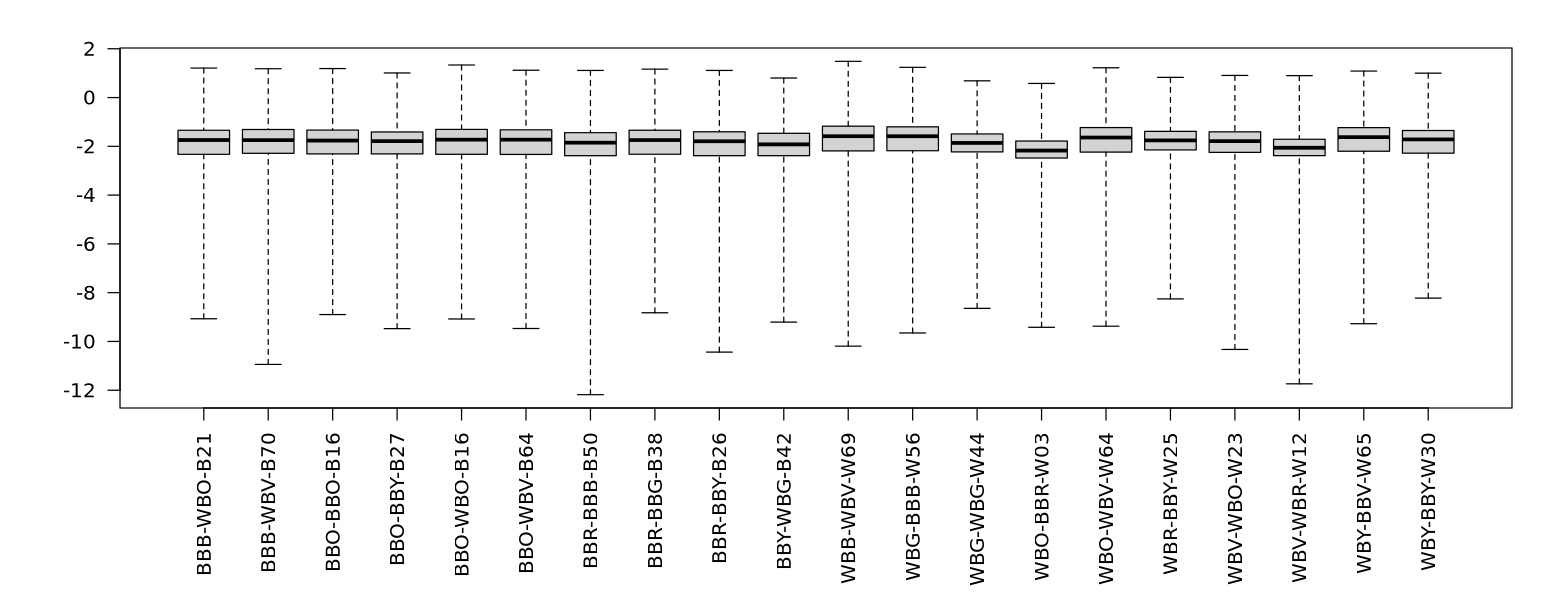

In [51]:
par(mar=c(8,5,2,2))
boxplot(log10(assays(dds)[["cooks"]]), range=0, las=2)

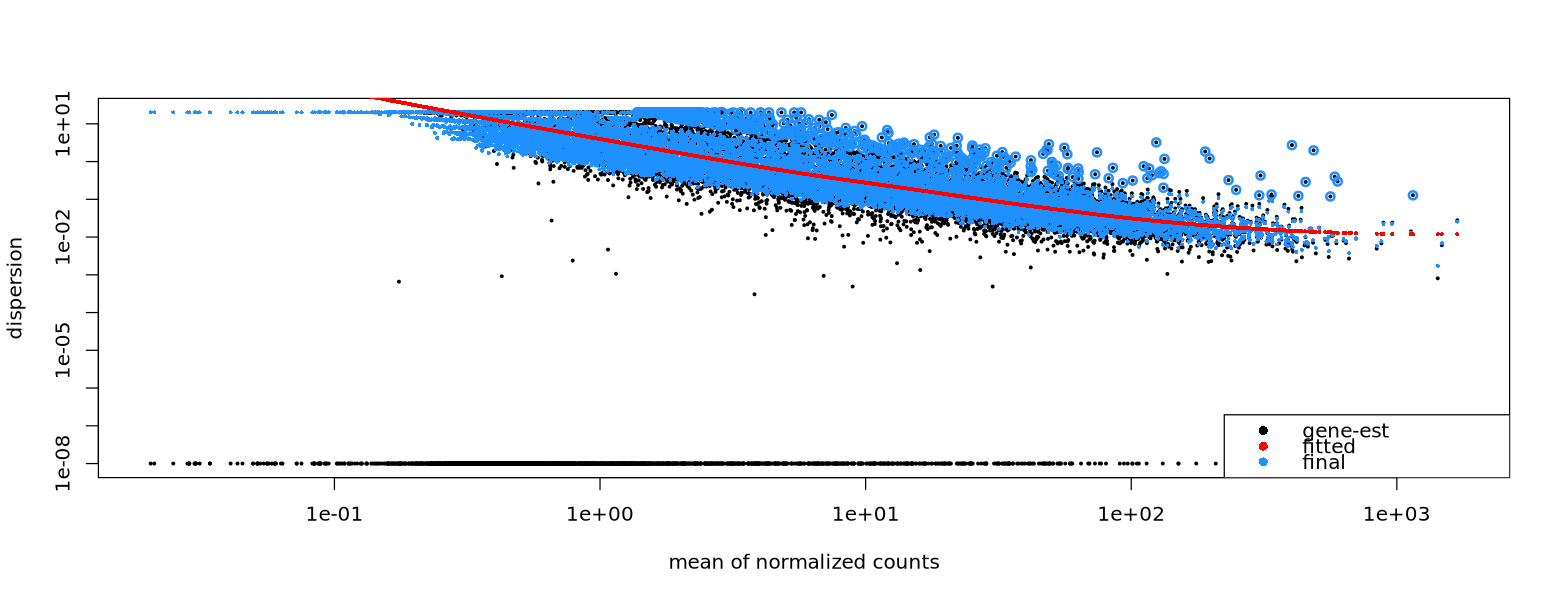

In [52]:
# dispersion estimates
plotDispEsts(dds)